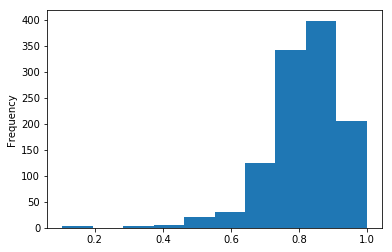

In [14]:
import os
import MySQLdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

con = MySQLdb.connect(host="localhost",port=3306,user="mira67",passwd="1234",db="nsidcgt")
sql = """SELECT b1,b2,b3,b4,b5,b6,b7,MP_F, I_F,W_F FROM Beaufo
        WHERE MP_F <= 0.5 AND day != 238 AND day != 244 AND day != 246 AND day > 212
        UNION
        SELECT b1,b2,b3,b4,b5,b6,b7,MP_F, I_F,W_F FROM Esiber
        WHERE MP_F <= 0.5 AND day != 195 AND day > 212
        UNION
        SELECT b1,b2,b3,b4,b5,b6,b7,MP_F, I_F,W_F FROM Cacana
        WHERE MP_F <= 0.5 AND day != 181 AND day != 192 AND day > 212
        UNION
        SELECT b1,b2,b3,b4,b5,b6,b7,MP_F, I_F,W_F FROM Cafram
        WHERE MP_F <= 0.5 AND day != 179 AND day > 212;
"""

df = pd.read_sql(sql, con)
table2 = table2.replace(9.99, np.nan)
#print df.head()
plt.figure
df['I_F'].plot.hist()
con.close()

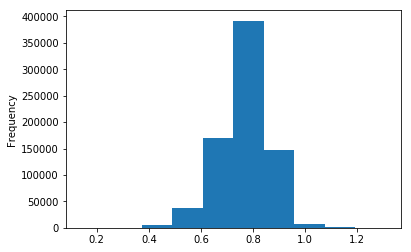

In [15]:
con = MySQLdb.connect(host="localhost",port=3306,user="mira67",passwd="1234",db="nsidcgt")
sql = """SELECT * FROM nsidcgt.arr_canadian where month = 5;
"""

df = pd.read_sql(sql, con)
print df.head()
plt.figure
df['b1'].plot.hist()
con.close()

In [16]:
print df.head()

   pid  year  month  day  nrow  ncol  qc  cloud      b1      b2      b3  \
0    1  2000      5    1     0     0   0      1  0.9089  0.8437  0.9368   
1    2  2000      5    1     0     1   0      1  0.7904  0.7102  0.8594   
2    3  2000      5    1     0     2   0      1  0.9007  0.8360  0.9288   
3    4  2000      5    1     0     3   0      1  0.7985  0.7211  0.8611   
4    5  2000      5    1     0     4   0      1  0.7764  0.6944  0.8524   

       b4      b5      b6      b7  
0  0.9416  0.5615  0.2608  0.1500  
1  0.8392  0.4340  0.1890  0.1495  
2  0.9347  0.5625  0.2754  0.1663  
3  0.8431  0.4395  0.1870  0.1495  
4  0.8251  0.4211  0.1855  0.1495  


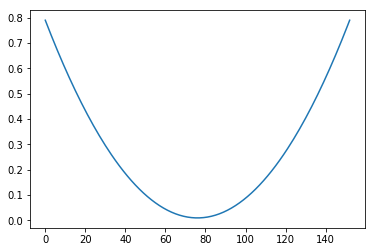

In [82]:
import matplotlib.pyplot as plt
day  =np.linspace(121,274,274-121) - (121.0+274.0)/2
n = 2
#np.power(day, n)/np.power(274,n)
#y = day**2
alpha = 10
beta = 0.01
plt.plot(alpha*np.power(day, n)/np.power(274,n)+beta)
plt.show()

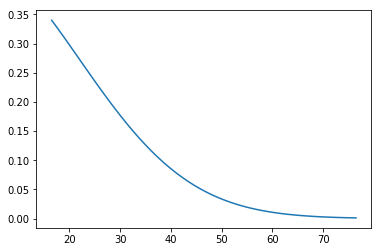

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 0
variance = 0.5
sigma = math.sqrt(variance)
day  =np.linspace(214,274) - (121.0+274.0)/2
mayfilter = np.linspace(121,274) - (121.0+274.0)/2
mayfilter[0:30] = 0.5
mayfilter[30:] = 0
x = np.linspace(-3, 3, 100)
beta = 0
alpha = 0.8
plt.plot(day,(alpha*mlab.normpdf(day/31, mu, sigma)+beta))

plt.show()

In [100]:
import os
import MySQLdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

#each year a plot, and calcualte a yearly mean to compare with nature
print("visualize results")
con = MySQLdb.connect(host="localhost",port=3306,user="mira67",passwd="1234",db="nsidcgt")
sql = """SELECT year,month,day,nrow,ncol,qc,
cloud,mpf,icef,wf
FROM esiber1115_dm
WHERE esiber1115_dm.year < 2012 AND esiber1115_dm.cloud = 0
"""

df = pd.read_sql(sql, con)
print df.shape
#group by year/month to compute MPF/IF/WF mean

grouped = df.groupby(['month','day','nrow','ncol'],as_index=False)
print("Number of Groups: ", len(grouped))
dfmean = grouped.aggregate(np.mean)
#print dfmean.head(n=5)
ngroup = dfmean.groupby(['month','day','nrow','ncol'],as_index=False)

con.close()
#os.system('espeak "done"')


Using Theano backend.


visualize results
(2082701, 10)
('Number of Groups: ', 311882)


('Number of Groups: ', 153)


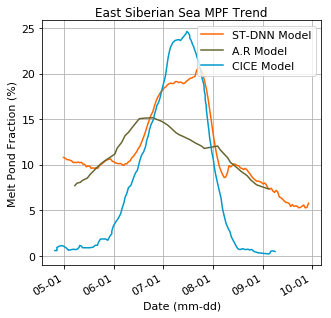

0

In [169]:
import matplotlib.dates as mdates
import datetime
from pylab import *


#daily average plot across years, and compare with figure data in literatures
plt.rcParams['figure.figsize'] = (5,5) # Make the figures a bit bigger
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['font.family'] = 'Times New Roman'

xl = pd.ExcelFile("figure_data.xlsx")
xl.sheet_names
df1 = xl.parse("MODIS MPF 2000-2011 mean")
df2 = xl.parse("CICE 2001-2013 mean MPF")

mgrouped = df.groupby(['month','day'],as_index=False)
print("Number of Groups: ", len(mgrouped))
mdfmean = mgrouped.aggregate(np.mean)
#print dfmean.head(n=5)
mngroup = mdfmean.groupby(['month','day'],as_index=False)
#visualize trend by month for many years
oldkey = 5
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%m-%d')
day = []
mpf = []
mpf_all = []
day_all = []
gn = 0
fig, ax = plt.subplots()
for key, grp in mngroup:#fix last key
    gn = gn + 1#count number of groups
    if (key[0] != oldkey) or (gn == len(mngroup)):#if year not change or last group
        #mpf = smooth(np.asarray(mpf),3,'hanning')
        #ax.plot(day, mpf, label=int(oldkey))
        mpf_all.extend(mpf)
        day_all.extend(day)
        day = []
        mpf = []
        oldkey = key[0]
    #cur_day = datetime.date(int(grp['year'].as_matrix()[0]),int(grp['month'].as_matrix()[0]),int(grp['day'].as_matrix()[0]))
    cur_day = datetime.date(1900,int(grp['month'].as_matrix()[0]),int(grp['day'].as_matrix()[0]))
    day.append(cur_day)
    mpf.append(grp['mpf'].as_matrix()[0])

mpf_all_f = savitzky_golay(mpf_all, 21, 3)
ax.plot(day_all, mpf_all_f, label='ST-DNN Model',color='#ff6600')
ax.plot(df1['Julian Day'],df1['MPF']*100, label='A.R Model',color='#666633')
ax.plot(df2['Julian Day'],df2['MPF'], label = 'CICE Model',color='#0099cc')
ax.xaxis.set_major_formatter(yearsFmt)
# format the ticks
#ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

fs = 11

plt.ylabel('Melt Pond Fraction (%)',fontsize=fs, color='black')
plt.xlabel('Date (mm-dd)',fontsize=fs, color='black')
plt.tick_params(axis='both', which='major', labelsize=fs)
plt.title('East Siberian Sea MPF Trend')
fig.autofmt_xdate()
ax.grid(True)
ax.legend(loc='upper right',prop={'size':fs})
plt.show()
os.system('espeak "done"')


In [123]:
#!python
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    import numpy as np
    from math import factorial

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')